# Textual Inversion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/huggingface/diffusers
!pip install torch accelerate transformers
!pip install xformers
!accelerate config default

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-ttscyrwz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-ttscyrwz
  Resolved https://github.com/huggingface/diffusers to commit 49ad61c2045a3278ea0b6648546c0824e9d89c0f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.8 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.17.0.dev0-py3-none-any.whl size=1006096 sha256=b436fffa08c69550f92d239f1869d230d536a88d6484253b69ab56b126244623
  Stored in directory: /tmp/pip-ephem-wheel-cache-tck5k6pf/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers


In [ ]:
!export MODEL_NAME="stabilityai/stable-diffusion-2-1-base"
!export DATA_DIR="/content/drive/MyDrive/pixart"

! accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1-base" \
  --train_data_dir="/content/drive/MyDrive/pixart" \
  --learnable_property="style" \
  --placeholder_token="<pixart>" --initializer_token="pixelart" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=5.0e-04 --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="/content/drive/MyDrive/textual-inversion-pixart" \
  --enable_xformers_memory_efficient_attention \
  --validation_prompt="<pixart> pixel-art cat" --num_validation_images=4 --validation_steps=100 \
  --checkpointing_steps=500

2023-05-16 19:41:43.616842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-16 19:41:51.125828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
05/16/2023 19:41:55 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

{'clip_sample_range', 'thresholding', 'variance_type', 'sample_max_value', 'dynamic_thresholding_ratio'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was not found in config. Values will be initialized to default values.
{'class_embed_type', 'time_cond_proj_dim', 'class_embeddings_concat', 'time_embedding_act_fn', 'addition_emb

## Inference

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1-base"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
pipe.load_textual_inversion("/content/drive/MyDrive/textual-inversion-pixart")

29152569160 :


  0%|          | 0/120 [00:00<?, ?it/s]

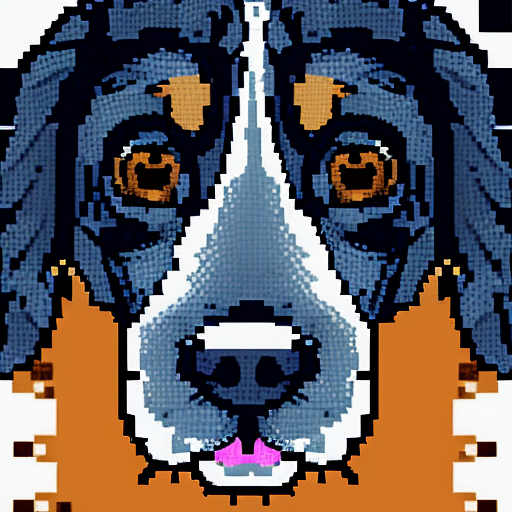

23930052590 :


  0%|          | 0/120 [00:00<?, ?it/s]

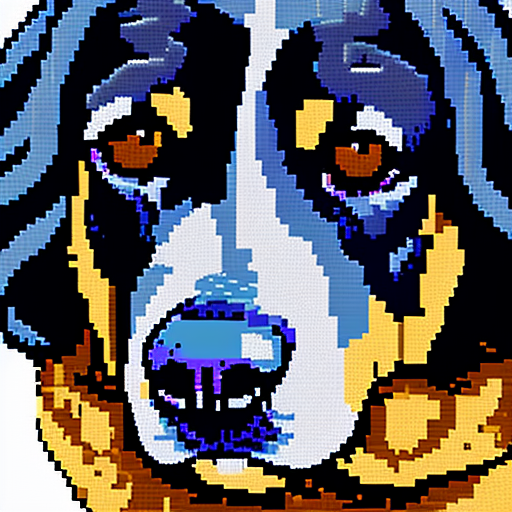

48024586658 :


  0%|          | 0/120 [00:00<?, ?it/s]

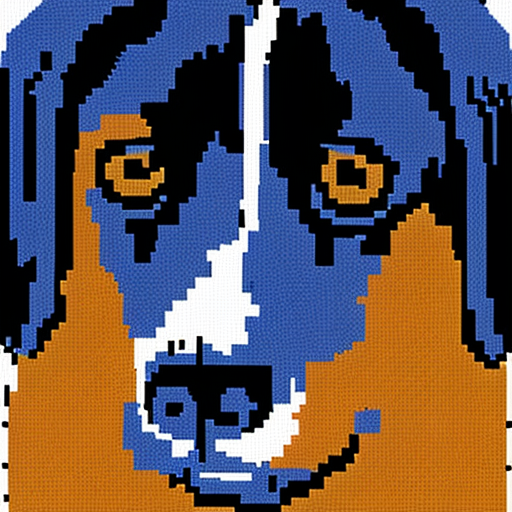

11002009845 :


  0%|          | 0/120 [00:00<?, ?it/s]

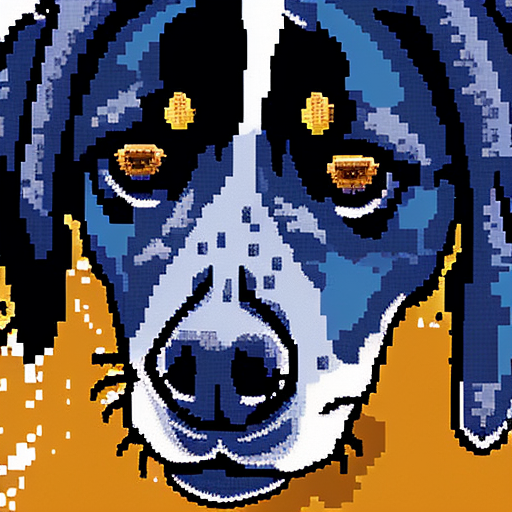

In [ ]:
from PIL import Image
import random
generator = torch.Generator(device='cuda')

img_number = 4
prompt = "<pixart> pixel-art style dog"
img_path = "/content/00127-1617672694.png"
guidance_scale=6.
strength=0.75
seed=random.randint(100, 99999999999)

generator.manual_seed(seed)
init_image = Image.open(img_path).convert("RGB")
init_image = init_image.resize((512, 512))

for i in range(0, img_number):
    seed = random.randint(100, 99999999999)
    print(seed, ':')
    generator.manual_seed(seed)
    image = pipe(prompt, image=init_image, num_inference_steps=150, guidance_scale=guidance_scale, eta=1., generator=generator, strength=strength).images[0]
    image.show()